### Business problem & dataset overview

We are working for a fintech company that wants to provide customers with a paid mobile app subscription that will allow them to track their finances.

To attract customers, the company releases a free version of the app.

The task is to identify which users will most likely NOT purchase the paid version of the app, so that additional offers can be provided to them. Accuracy is key, because increased targeted advertising is costly.

Our dataset features:
- User ID
- Day and time at which the user first opened the app
- Day of the week (numerical) at which the user first opened the app
- Hour of the day at which the user first opened the app
- User age
- Screen list: every screen name visited by user in the app
- Number of screens visited in the app by the user
- Whether the user played the available minigame
- Whether the user gave a "like" rating to the app
- Whether the user used the app's premium feature
- Whether the user enrolled in the paid product
- The date of enrolment (if any)

In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil import parser

In [144]:
dataset = pd.read_csv("P39-CS3-Data/appdata10.csv")
dataset.head(n=10)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0
6,144649,2012-12-25 02:33:18.461,1,02:00:00,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaN,0
7,249366,2012-12-11 03:07:49.875,1,03:00:00,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaN,0
8,372004,2013-03-20 14:22:01.569,2,14:00:00,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,2013-04-27 22:24:54.542,0
9,338013,2013-04-26 18:22:16.013,4,18:00:00,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,2013-04-26 18:31:58.923,0


In [145]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [146]:
dataset.describe() # generate descriptive statistics

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


### Data pre-processing

In [147]:
# Formatting the "hour" column to obtain descriptive statistics
dataset["hour"] = dataset.hour.str.slice(1, 3).astype(int) # 1st and 2nd numbers

In [148]:
dataset2 = dataset.copy().drop(columns = ["user", "screen_list", "enrolled_date", "first_open", "enrolled"])

In [149]:
dataset2 # only contains numerical columns

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1
...,...,...,...,...,...,...,...
49995,3,13,32,13,0,0,0
49996,1,0,35,4,0,1,0
49997,2,22,39,25,0,0,0
49998,6,12,27,26,0,0,0


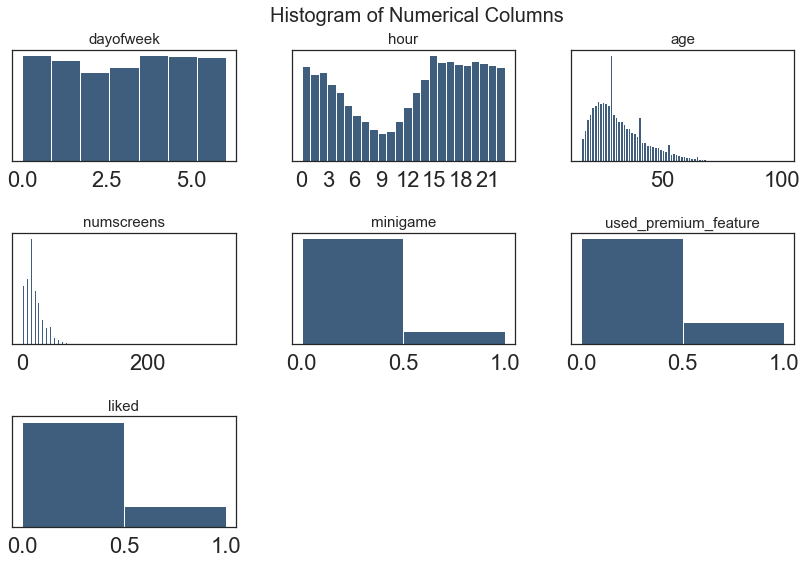

In [150]:
# Generating histograms to visualize the dataset
subplot_title_info = {'fontsize': 15,
        'fontweight' : 5,
        'verticalalignment': 'baseline',
        'horizontalalignment': 'center'}
hour_ticks = [0, 3, 6, 9, 12, 15, 18, 21]

plt.suptitle("Histogram of Numerical Columns", fontsize = 20,
            x = 1, y = 3)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(3, 3, i) # dimensions of our plot
    f = plt.gca() # get current axis index
    f.set_title(dataset2.columns.values[i - 1], subplot_title_info)
    f.axes.get_yaxis().set_visible(False)
    vals = np.size(dataset2.iloc[:, i - 1].unique())
    plt.hist(dataset2.iloc[:, i-1], bins = vals, color = "#3F5D7D")
    if (i == 2):
        f.axes.set_xticks(ticks = hour_ticks)
        
plt.tight_layout(rect = [0, 1, 2, 3])

In [151]:
dataset = pd.read_csv("P39-CS3-Data/appdata10.csv")
dataset["hour"] = dataset.hour.str.slice(1, 3).astype(str) # 1st and 2nd numbers
dataset2 = dataset.copy().drop(columns = ["user", "screen_list", "enrolled_date", "first_open", "enrolled"])

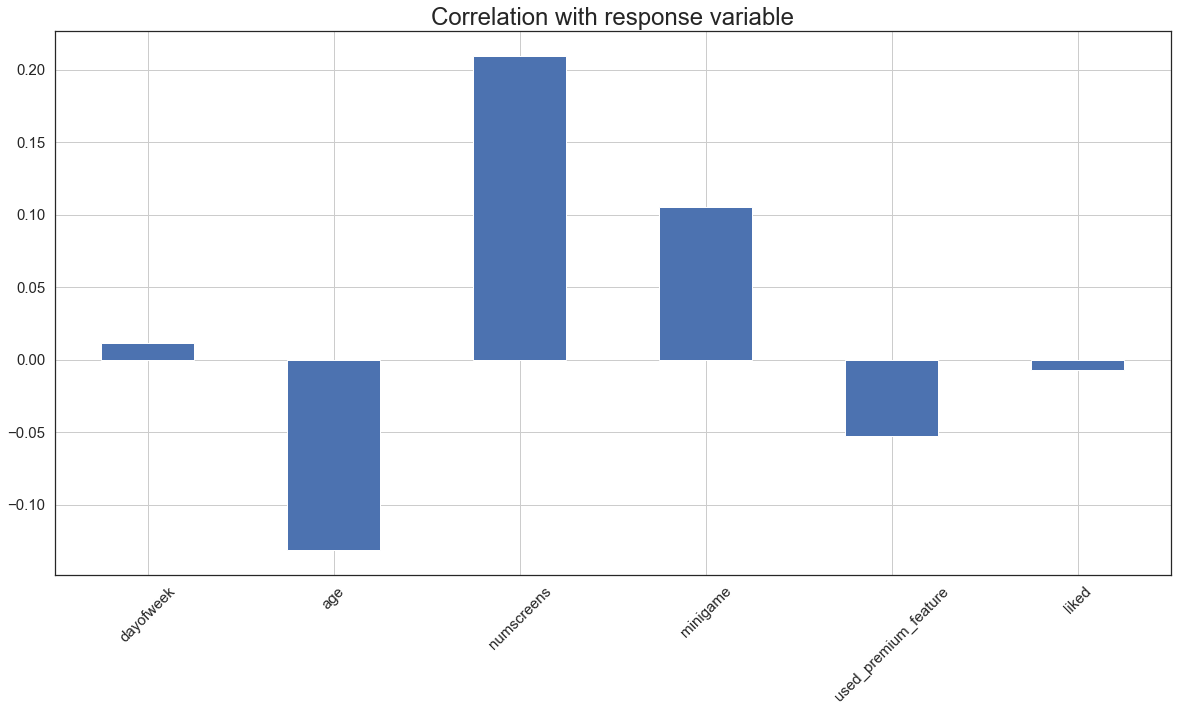

In [152]:
dataset2.corrwith(dataset.enrolled).plot.bar(figsize = (20, 10),
                                            fontsize = 15,
                                            rot = 45,
                                            grid = True,
                                            title = "Correlation with response variable")


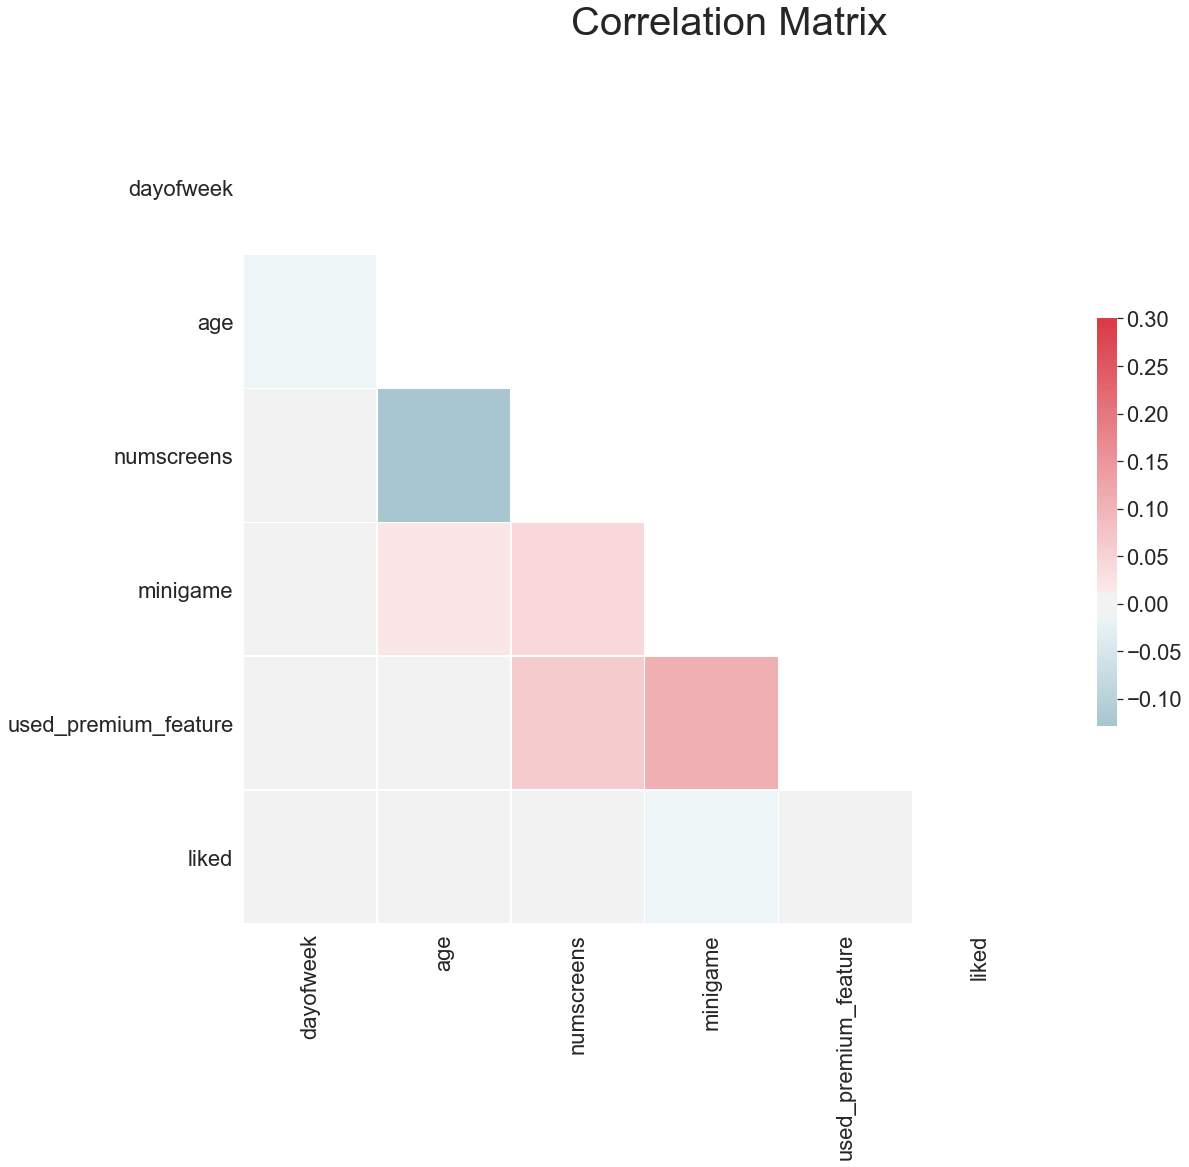

In [153]:
# Generating a correlation matrix
sns.set(style = "white", font_scale = 2)
corr = dataset2.corr()

# generate mask for upper triangle
# this is because the matrix is symmetric
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generating a customized diverging color map
cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Draw heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 0.3, center = 0,
          square = True, linewidths = 0.5, cbar_kws = {"shrink":.5})

### Feature Engineering

In [154]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [155]:
# Convert "first_open" into datetime object
dataset["first_open"] = [parser.parse(row_date) for row_date in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_date) if isinstance(row_date, str) else row_date for row_date in dataset["enrolled_date"]]

In [156]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                            object
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [157]:
# Add a new column for time between enrolment and first open of the app
dataset["difference"] = (dataset.enrolled_date - dataset.first_open).astype("timedelta64[h]")

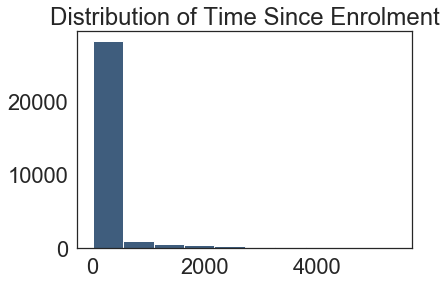

In [158]:
plt.hist(dataset["difference"].dropna(),  color = "#3F5D7D")
plt.title("Distribution of Time Since Enrolment")
plt.show()

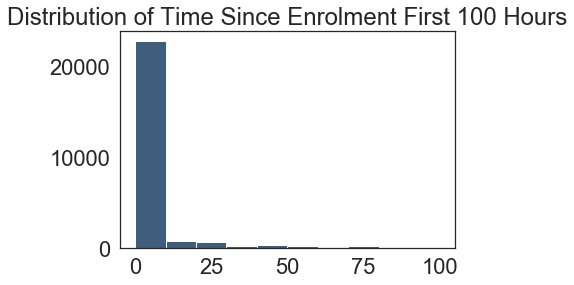

In [159]:
plt.hist(dataset["difference"].dropna(),  color = "#3F5D7D",
        range = [0, 100])
plt.title("Distribution of Time Since Enrolment First 100 Hours")
plt.show()

In [160]:
# For those people outside the 48 hour cutoff mark,
# we will mark them as unenrolled
dataset.loc[dataset.difference > 48, "enrolled"] = 0

In [161]:
dataset = dataset.drop(columns = ["difference", "enrolled_date", "first_open"])
# drop unused columns

In [162]:
top_screens = pd.read_csv("P39-CS3-Data/top_screens.csv").top_screens.values

In [163]:
# Create as many commas as there are screens
# this will help us count the number of different screens in the dataset
dataset["screen_list"] = dataset.screen_list.astype(str) + ","

for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int) # 0 or 1 values
    dataset["screen_list"] = dataset.screen_list.str.replace(sc+",", "")

In [164]:
dataset["Other"] = dataset.screen_list.str.count(",")

In [165]:
dataset = dataset.drop(columns = ["screen_list"])

In [166]:
# Funnels = group of screens that belong to the same set
# we do not want correlated screens
# we will group screens by funnel

savings_screens = ["Saving1",
                  "Saving2",
                  "Saving2Amount",
                  "Saving4",
                  "Saving5",
                  "Saving6",
                  "Saving7",
                  "Saving8",
                  "Saving9",
                  "Saving10"]

dataset["SavingCount"] = dataset[savings_screens].sum(axis = 1)
dataset = dataset.drop(columns = savings_screens)

In [167]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker',
       'Other', 'SavingCount'],
      dtype='object')

In [168]:
cm_screens = ["Credit1",
             "Credit2",
             "Credit3",
             "Credit3Container",
             "Credit3Dashboard"]
cc_screens = ["CC1",
             "CC1Category",
             "CC3"]
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["CMCount"] = dataset[cm_screens].sum(axis = 1)
dataset["CCCount"] = dataset[cc_screens].sum(axis = 1)
dataset["LoansCount"] = dataset[loan_screens].sum(axis = 1)
dataset = dataset.drop(columns = cm_screens)
dataset = dataset.drop(columns = cc_screens)
dataset = dataset.drop(columns = loan_screens)
dataset.head(n=7)

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,02,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,01,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1
5,56480,2,09,20,14,0,0,1,0,0,...,0,0,0,0,0,6,0,2,0,1
6,144649,1,02,35,3,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0


In [169]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,0.293660,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,0.455443,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


In [170]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingCount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [171]:
dataset.to_csv("new_appdata10.csv", index = False)

In [172]:
dataset = pd.read_csv("new_appdata10.csv")

### Model Preparation

In [173]:
y = dataset["enrolled"]
X = dataset.drop(columns = "enrolled")

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [175]:
# we do not need user ID in our model training
# but we need to associate our model predictions to their
# respective user IDs
train_identifier = X_train["user"]
X_train = X_train.drop(columns = "user")
test_identifier = X_test["user"]
X_test = X_test.drop(columns = "user")

In [176]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
# to preserve indexation and column names
X_train_scaled = pd.DataFrame(sc_X.fit_transform(X_train)) 
X_test_scaled = pd.DataFrame(sc_X.transform(X_test))

# recuperate column names
X_train_scaled.columns = X_train.columns.values
X_test_scaled.columns = X_train.columns.values

# recuperate column indices
X_train_scaled.index = X_train.index.values
X_test_scaled.index = X_test.index.values

# assign the scaled sets to our initial training and testing sets
X_train = X_train_scaled
X_test = X_test_scaled

### Building and training our model

In [177]:
from sklearn.linear_model import LogisticRegression
# We build an L2-regularized model
# L2 or Ridge Regression = adds a penalty term to the loss function
# Penalty term is proportional to squared Euclidean magnitude of weight vector
# Ultimately prevents overfitting of the model
classifier = LogisticRegression(random_state = 0, 
                               penalty = "l2")
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [178]:
y_pred = classifier.predict(X_test)

In [179]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [180]:
print(cr)

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      6289
           1       0.77      0.77      0.77      6211

    accuracy                           0.77     12500
   macro avg       0.77      0.77      0.77     12500
weighted avg       0.77      0.77      0.77     12500



Test Data Accuracy: 77.00%


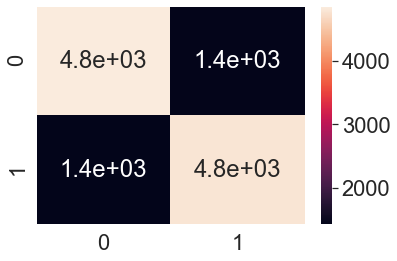

In [181]:
sns.heatmap(cm, annot = True)
print("Test Data Accuracy: {:.2f}%" .format(100*accuracy_score(y_test, y_pred)))

In [182]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                            X = X_train,
                            y = y_train,
                            cv = 10)

In [183]:
print("10-fold cross-validated accuracy: %0.3f %% +/- %0.3f" % (accuracies.mean(), 2*accuracies.std()))

10-fold cross-validated accuracy: 0.767 % +/- 0.012


### Using our model to identify customers that would respond best to additional advertising

In [85]:
final_results = pd.concat([y_test, test_identifier], axis = 1).dropna()

In [86]:
final_results["predicted_result"] = y_pred
final_results[["user", "enrolled", "predicted_result"]].reset_index(drop = True)

,user,enrolled,predicted_result
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
12495,105993,0,1
12496,288268,1,1
12497,12780,1,1
12498,299091,1,0
